Link to this notebook on gist:
https://gist.github.com/MoGaber/f6b0c6d6cdbd48db768be67606090af5

Importing the necessary libraries

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import cv2                
import numpy as np         
import os                  

In [2]:
#the directory where I saved my images:
noon_DIR = r'D:\Courses\CS156\LBA\landmark\mylandmark\noon'
afternoon_DIR = r'D:\Courses\CS156\LBA\landmark\mylandmark\afternoon'
image_size = 512 

In [3]:
#importing the images and transforming them into numpy array with size 512*512
def create_train_data(dirr):
    data = []
    for img in os.listdir(dirr):
        path = os.path.join(dirr,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (image_size,image_size))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        data.append(np.array(img))
    return data


#creating a list of images with labels of "noon: 0" or "afternoon: 1"
noon_images = create_train_data(noon_DIR)
noon_label = [0 for i in range(len(noon_images))]
afternoon_images = create_train_data(afternoon_DIR)
afternoon_label = [1 for i in range(len(afternoon_images))]


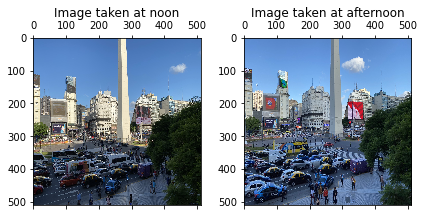

In [4]:
#visualizing images:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.matshow(noon_images[0])
plt.title('Image taken at noon', y=1.09)

ax2 = fig.add_subplot(1,2,2)
ax2.matshow(afternoon_images[0])
plt.title('Image taken at afternoon',y=1.09)


plt.tight_layout()
plt.show()

In [5]:
# Now, we can add all images together to prepare them for PCA:
images_concatenated = np.concatenate([np.array([np.concatenate(i) for i in noon_images]),
                       np.array([np.concatenate(i) for i in afternoon_images]) ])
#adding labels into one list:
labels = np.concatenate([noon_label, afternoon_label])

In [6]:
#total number of image:
len(images_concatenated)

78

In [7]:
#shape of images:
shape = images_concatenated.shape
shape

(78, 262144, 3)

#### We see that images are 3d array because they have colors. To use PCA we have to reshape it first:

In [8]:
images_concatenated  = images_concatenated.reshape(((shape[0], shape[1]*shape[2])))

In [9]:
images_concatenated.shape

(78, 786432)

#### Now, let's project images to 2d using PCA:

In [10]:
pca = PCA(n_components=2, random_state=0)

projected_images = pca.fit_transform(images_concatenated)

#### Now, we have successfully obtained the compoenets:

In [13]:
print(f"Number of components: {len(pca.components_)}, the variance covered: {sum(pca.explained_variance_ratio_)}")

Number of components: 2, the variance covered: 0.2016867270514541


#### we see that we have two components that cover only 20% of the total variance.

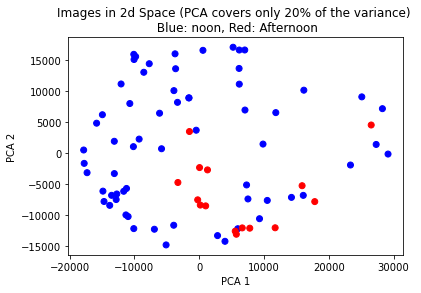

In [14]:
#Now we can visualize the images in the new space:
colors = np.array(["blue", "red"])
plt.scatter(projected_images[:,0], projected_images[:,1], c=colors[labels])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Images in 2d Space (PCA covers only 20% of the variance) \n Blue: noon, Red: Afternoon")
plt.show()

#### Now, we can show the resconstruction from each low-dimensional representation

In [15]:
projected_images.shape

(78, 2)

In [16]:
reconstruct_images = pca.inverse_transform(projected_images)

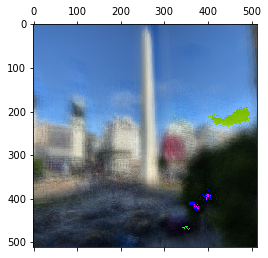

In [46]:
plt.matshow(reconstruct_images[1].reshape(512, 512, 3).astype(np.uint8))

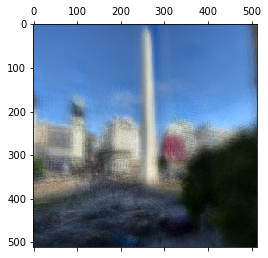

In [52]:
plt.matshow(np.clip(reconstruct_images[1].reshape(512, 512, 3).astype(int), 0, 255))

In [15]:
def plot_image(i):
    

    fig = plt.figure()

    fig.add_subplot(1,2,1).matshow(images_concatenated[i].reshape(512, 512, 3))
    plt.title('Original', y=1.08)

    fig.add_subplot(1,2,2).matshow((reconstruct_images[i].reshape(512, 512, 3)).astype(np.uint8))
    plt.title('Reconstructed',y=1.08)


    plt.tight_layout()
    plt.show()
    


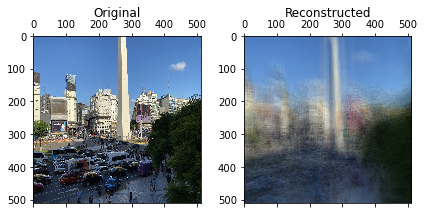

In [16]:
plot_image(0)

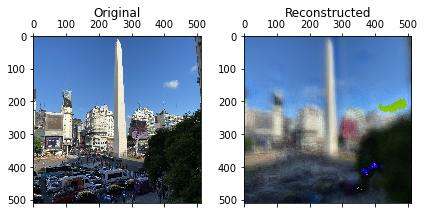

In [17]:
plot_image(1)

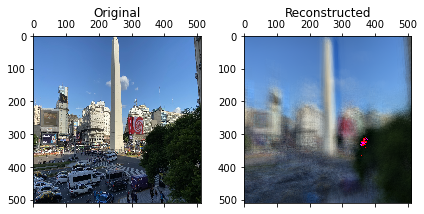

In [18]:
plot_image(15)

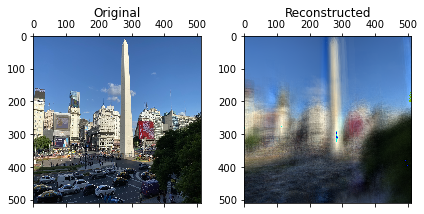

In [19]:
plot_image(20)

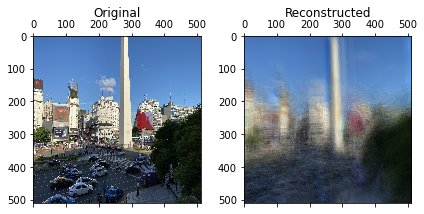

In [20]:
plot_image(40)

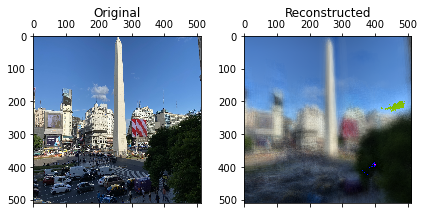

In [21]:
plot_image(50)

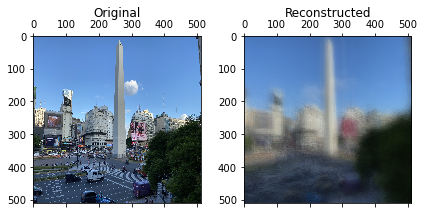

In [22]:
plot_image(71)

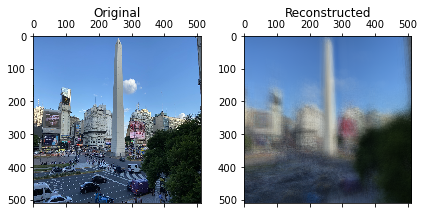

In [23]:
plot_image(72)

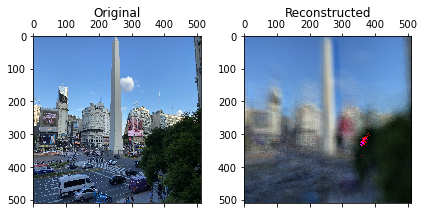

In [24]:
plot_image(73)

#### From the scatterpot above, we see that (30000, 15000) seems to be away from any known location:

In [25]:
point_far_away = np.array([30000, 15000]) 
reconstruct_point = pca.inverse_transform(point_far_away)

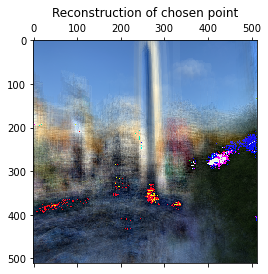

In [26]:
plt.matshow((reconstruct_point.reshape(512, 512, 3)).astype(np.uint8))
plt.title("Reconstruction of chosen point", y= 1.08)
plt.show() 

### Extension
I went along and took an image of another landmark that is far from my point. Here, I will try to reconstruct the image using the components that I generated above.

In [25]:
#uploading the new point:
dirr = r'D:\Courses\CS156\LBA\landmark\newpoint'
new_point = os.listdir(dirr)
path = os.path.join(dirr,new_point[0])
img = cv2.imread(path,cv2.IMREAD_COLOR)
img = cv2.resize(img, (image_size,image_size))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

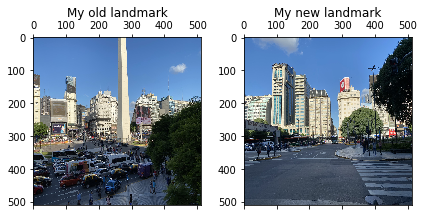

In [26]:
#visualizing images:

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.matshow(noon_images[0])
plt.title('My old landmark', y=1.09)

ax2 = fig.add_subplot(1,2,2)
ax2.matshow(img)
plt.title('My new landmark',y=1.09)


plt.tight_layout()
plt.show()

In [27]:
newpoint_shape = img.shape

In [28]:
#project the new landmark on the components:
projected_newlandmark = pca.fit_transform(img.reshape((newpoint_shape[0], newpoint_shape[1]*newpoint_shape[2])))
retransformed_landmark = pca.inverse_transform(projected_newlandmark)

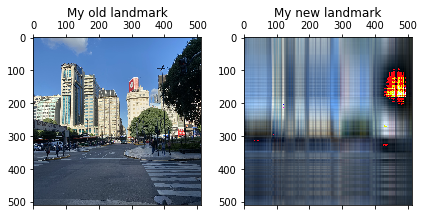

In [29]:
#visualizing images:

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.matshow(img)
plt.title('My old landmark', y=1.09)

ax2 = fig.add_subplot(1,2,2)
ax2.matshow(retransformed_landmark.reshape(newpoint_shape[0], newpoint_shape[1], 3).astype(np.uint8))
plt.title('My new landmark',y=1.09)


plt.tight_layout()
plt.show()

We can see that the new construction is not very good because we were using only two components that cover only 20% variance. Also, the two components were of only 1 landmark. To make this reconstruction much better, we should collect images from many landmarks (not just one) because this way, we will have components that cover enough variance to reconstruct new points.

### Suggestion for a new LBA assignment
Based on the extra task I did above, I would like to suggest a new version for the LBA:
- Go around the city and collect pictures of many buildings (at least 20 buildings)
- Use PCA to reduce the images to components that cover 90% of the variance (EigenBuildings)
- Show the reconstruction from each low-dimensional representation
- Go and take a picutre of a new building that wasn't included in the images that you got above
- Use the eigenbuildings that you got above to reconstruct the new building image
- Extra: Use your eigenbuildings to construct new designs of buildings (random combinations of the components)

In [ ]:
# if you want to do rescaling:

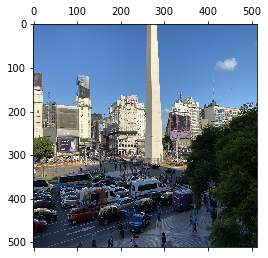

In [46]:
plt.matshow(images_concatenated[0].reshape(512, 512, 3))

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(images_concatenated)
train_img = scaler.transform(images_concatenated)


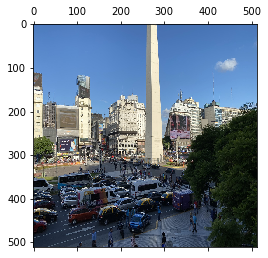

In [56]:
myim = scaler.inverse_transform(train_img[0])
plt.matshow(myim.reshape(512, 512, 3).astype(np.uint8))
